<html>
    <summary></summary>
         <div> <p></p> </div>
         <div style="font-size: 20px; width: 800px;"> 
              <h1>
               <left>Intro to Basic Probability and Statistics: Hypothesis Testing, Significance, P-Values.</left>
              </h1>
              <p><left>============================================================================</left> </p>
<pre>Course: BIOM 480A5, Spring 2025
Instructor: Brian Munsky
Authors: Huy Vo, Ania Baetica, Brian Munsky
Contact Info: munsky@colostate.edu
</pre>
         </div>
    </p>

</html>

<details>
  <summary>Copyright info</summary>

```
Copyright 2024 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>



# Learning Objectives

Upon completion of this lesson, you should be able to:
- Describe the concepts and approaches of **Hypothesis Testing**
- Define what is meant by **Significance**
- Describe the meaning and use of **P-Values**
- Describe and Perform **Student’s t-test**
- Describe and Perform **Pairwise Student’s t-test**
- Describe and Perform **Willcox Rank-Sum test**
- Describe and Perform **Willcox Signed-Rank test**
- Describe and Perform **ANOVA** test for variations in multiple groups
- Describe and Perform **Tukey’s HSD test** for pairwise comparisons

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rng
import scipy.stats as stats

# %pip install statsmodels   
# %pip install seaborn
# If you don't have them, uncomment the lines above to install statsmodels and seaborn
import statsmodels

In [2]:
# Make sure that the user is usig the currect working directory
import os
path = os.getcwd()
# Get the folder name
folder = os.path.basename(path)

print('Checking current directory...')
if folder == 'Module3-Statistics':
    print(f'You are currently in the correct directory: {folder}')
elif folder == '480A5CourseMaterials':
    os.chdir('Module3-Statistics')
    print('Changed to Module3-Statistics directory')
else:
    print('You are in the wrong directory. Navigate to the Module3-Statistics directory and try again')

Checking current directory...
You are currently in the correct directory: Module3-Statistics


# **1. Introduction**

In this lesson, we will introduce the concept of hypothesis testing, significance, and p-values. We will also introduce several statistical tests that are commonly used in biology and bioinformatics. These tests include the Student’s t-test, the Wilcoxon rank-sum test, the Wilcoxon signed-rank test, the ANOVA test, and Tukey’s HSD test. We will discuss the assumptions of these tests, how to perform them, and how to interpret the results.

But first, we need to generate some data to work with.

## **1.A. Example Data Sets.**

In [3]:
# Example Data Sets
# In this notebook, we are going to use several different pairs of data sets to illustrate
# different hypothesis tests.

# The first two data sets are unpaired sets of random numbers drawn from a NORMAL distribution
# with different means but the same standard deviations.
Nnormal = [100,120]
normal0 = rng.normal(0, 1, Nnormal[0])
normal1 = rng.normal(0.5, 1, Nnormal[1])

In [4]:
# The next pair are paired data sets, where each pair of numbers is drawn from a NORMAL distribution,
# but the second number in each pair is drawn from a normal distribution with a mean that is
# different than the mean of the first number in the pair. The standard deviation of the two
# distributions is the same.
Npaired = 100
parametersPatients = rng.normal(10, 0.5, Npaired) # 
effect = 0.2
NormalPairBefore = rng.normal(parametersPatients, 1) 
NormalPairAfter = rng.normal(parametersPatients+effect, 1) 

In [5]:
# The next pair of data sets are unpaired data sets drawn from a LOGNORMAL distribution with the
# same standard deviation and the same means.
Nlognormal = [100,120]
lognormal0 = rng.lognormal(0, 1, Nlognormal[0])
lognormal1 = rng.lognormal(0, 1, Nlognormal[1])

In [6]:
# The next pair are paired data sets, where each pair of numbers is drawn from a LOGNORMAL distribution,
# but the second number in each pair is drawn from a lognormal distribution with a mean that is
# different than the mean of the first number in the pair. The standard deviation of the two
# distributions (of the log of the rv) is the same.
Npaired = 100
parametersPatients = rng.normal(10, 0.5, Npaired) 
effect = 0.2
LogNPairBefore = rng.lognormal(np.log(parametersPatients), 1.)
LogNPairAfter = rng.lognormal(np.log(parametersPatients+effect), 1.)


# **2. Hypothesis testing**

![alt text](figuresC/image.001.png)

## **2.A. The Testing Process**

![alt text](figuresC/image.002.png)

## **2.B. Interpreting Results**

The outcome of a hypothesis test provides insights into the plausibility of the null hypothesis. A rejection of the null hypothesis suggests evidence in favor of the alternative hypothesis, while a failure to reject implies insufficient evidence to warrant rejection.

## **2.C. Significance and P-Values**

Hypothesis testing involves two critical concepts that serve as guiding beacons in our statistical journey: **significance** and **p-values**. These concepts provide us with quantitative measures to evaluate the strength of evidence in support of our hypotheses and to make informed decisions based on our analyses.

### **2.C.1. Significance: Separating Signal from Noise**

![alt text](figuresC/image.003.png)

### **2.C.2. Test Statistics: Quantifying Differences**

![alt text](figuresC/image.004.png)

### **2.C.3. P-Values: Assessing Evidence**

![alt text](figuresC/image.005.png)

### **2.C.4. Interpreting P-Values in the Context of Significance**

![alt text](figuresC/image.006.png)

### **2.C.5. Significance, P-Values, and Decision Making**

Significance, p-values, and test statistics play pivotal roles in the decision-making process during hypothesis testing. By setting a significance level ($\alpha$) beforehand, we establish a threshold for rejecting the null hypothesis. If the calculated p-value falls below this threshold, and the test statistic exceeds critical values, we deem the results statistically significant and infer that the observed effect is unlikely to occur due to chance alone.

# **3. Parametric and Non-Parametric Tests** 

**Parametric tests** make assumptions about the distribution of the data, typically assuming that the data follow a specific probability distribution, such as the normal distribution (see t-test below.)

**Non-parametric tests**, on the other hand, do not make assumptions about the distribution of the data or make fewer assumptions compared to parametric tests (see Wilcox signed rank test below). They are used when the data do not meet the assumptions of parametric tests or when the data are ordinal or non-normally distributed.

Here are some key differences between parametric and non-parametric tests:

**Assumptions**: Parametric tests make specific assumptions about the population distribution, such as normality and homogeneity of variances, while non-parametric tests make fewer or no assumptions about the distribution of the data.

**Type of Data**: Parametric tests are often used for interval or ratio scale data that are normally distributed, while non-parametric tests are more flexible and can be used with ordinal, interval, or ratio scale data, as well as non-normally distributed data.

**Test Statistics**: Parametric tests use test statistics that are based on the parameters of the population distribution (e.g., mean, standard deviation), while non-parametric tests use test statistics that are based on the ranks or order of the data.

**Power**: Parametric tests tend to have higher statistical power (ability to detect true differences or effects) when the assumptions are met, while non-parametric tests may have lower power but are more robust to violations of assumptions.

In summary, the choice between parametric and non-parametric tests depends on the nature of the data, the assumptions that can be made about the data, and the specific research question being addressed. If the assumptions of parametric tests are met, they are generally preferred because they can provide more powerful statistical tests. However, if the assumptions are violated, non-parametric tests may be more appropriate.

## **3.A. Parametric Test Example -- Student's T-Test**
![alt text](FiguresC/image.006B.png)


The **Student's t-test** is a **parametric statistical test** used to determine **is there is a significant difference between the means of two groups**. The t-test is commonly used in scientific research, especially in fields such as psychology, medicine, and biology, where it is used to compare means from experiments. For example, it often used to assess the effectiveness of interventions or treatments.

It was developed by **William Sealy Gosset**, who published it **under the pseudonym "Student" in 1908** while working at the Guinness Brewery in Dublin, Ireland. 

The t-test is particularly useful when working with **small sample sizes** or **when the population standard deviation is unknown**.

The formula for the t-test depends on whether the samples being compared are independent or dependent (paired).

### **3.A.1. Independent Samples t-test**
For independent samples, the t-statistic is computed by:
$$
t = \frac{{\bar{X}_1 - \bar{X}_2}}{{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}}
$$

Where:

\begin{align*}
    & \bar{X}_1 \text{ and } \bar{X}_2 \text{ are the sample means of the two groups}, \\
    & n_1 \text{ and } n_2 \text{ are the sample sizes of the two groups}, \\
    & s_p \text{ is the pooled standard deviation, given by:} \\
    & s_p = \sqrt{\frac{{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}}{{n_1 + n_2 - 2}}}, \\
    & \text{where } s_1 \text{ and } s_2 \text{ are the standard deviations of the two groups}.
\end{align*}

Under the **Null Hypothesis** that the means of the two groups are equal, the t-statistic would follow a **t-distribution** with $n_1+n_2−2$ degrees of freedom.


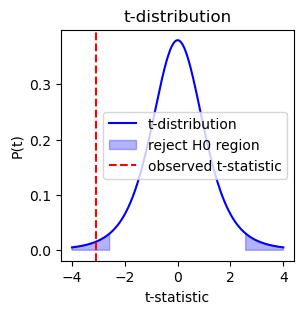

In [7]:
# Plotting the Student's t Distribution

# Make a figure plotting the Student's t distribution. Shade the area under the curve
# that corresponds to the significance level alpha. Also, plot a vertical line at the
# observed t-statistic value. The title of the plot should be the title parameter.
def plot_t_distribution(ax, alpha, observed_value, title=' ', sided='two-sided'):
    # Create a range of x values from -4 to 4
    x = np.linspace(-4, 4, 1000)
    # Create a t-distribution with df degrees of freedom
    t = stats.t.pdf(x, 5)
    # Plot the t-distribution
    ax.plot(x, t, 'b', label='t-distribution')
    # Shade the area under the curve that corresponds to the significance level alpha
    if sided == 'two-sided':
        ax.fill_between(x, 0, t, where=(x > stats.t.ppf(1-alpha/2, 5)) | (x < stats.t.ppf(alpha/2, 5)), color='b', alpha=0.3, label='reject H0 region')
    elif sided == 'less':
        ax.fill_between(x, 0, t, where=(x < stats.t.ppf(alpha, 5)), color='b', alpha=0.3, label='reject H0 region')
    elif sided == 'greater':
        ax.fill_between(x, 0, t, where=(x > stats.t.ppf(1-alpha, 5)), color='b', alpha=0.3, label='reject H0 region')

    # Plot a vertical line at the observed t-statistic value
    ax.axvline(observed_value, color='r', linestyle='--', label='observed t-statistic')
    # Add a legend
    ax.legend()
    # Set the title of the plot
    ax.set_xlabel('t-statistic')
    ax.set_ylabel('P(t)')
    ax.set_title(title)
   
t_statistic = -3.1
significance_level = 0.05
sided = 'two-sided'
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plot_t_distribution(ax, significance_level, t_statistic, sided=sided, \
                    title=f't-distribution')


### **3.A.2. P-values for the Independent Samples t-test:**
Under the null hypothesis that the two distributions have the same mean, the t-statistic would be close to zero. The P-value using the t-test is found by calculating the probability that the a random sample drawn from from a t-distributon would be at least as large/small as the calculated t-statistic.  

The probability that a larger $t$ would be sampled by chance is found by calculating **survival function** for the absolute value of $t$ (i.e., $\text{surv}(|t|) = 1-CDF(|t|)$). 

*Two-Sided Test*: In a two-sided test, the null hypothesis typically states that there is no difference between the means of the two related groups, while the alternative hypothesis states that there is a difference, without specifying the direction of the difference. The two-sided test is used when you want to determine if there is a significant difference between the means in either direction. In this case, the critical region is split between the two tails of the distribution, and the p-value that at last as large a difference would be observed in the mean of the two populations is determined as $PV(t) = 2*\text{surv}(|t|)$.

*One-Sided Test*: In a one-sided test, the null hypothesis states that there is no difference or that group 2 is greater than or equal to group 1, while the alternative hypothesis specifies that group 1 is greater than group 2. The one-sided test is used when you are specifically interested in whether one group is greater than the other, but not if it's smaller. The critical region is located entirely in one tail of the distribution, and the p-value for testing if is determined as $PV(t) = \text{surv}(t)$.

### **3.A.3. Important limitations of the Independent Samples t-test:**

Like any test, the t-test has important limitations that one should consider before applying the test:

1) **Assumption of Normality**: The t-test assumes that the data in each group are normally distributed. If this assumption is violated, the results of the test may be invalid.

2) **Sensitive to Outliers**: The t-test can be sensitive to outliers, particularly when sample sizes are small.

3) **Equal Variances Assumption**: The traditional independent samples t-test assumes that the variances of the two groups are equal. If this assumption is violated, alternative versions of the t-test, such as Welch's t-test, should be used.

4) **Sample Size**: The t-test may not perform well with very small sample sizes, as the t-distribution approaches the normal distribution only as sample size increases.

### **3.A.4. Examples of One- and Two-Sided t-tests.**

In [8]:
# Illustration of the Independent Student's t-test

# Define a function for the t-test
def ttest(data0, data1, alternative='two-sided' ):
    # Compute the number of samples in each group
    N = [len(data0), len(data1)]
    Ndof = N[0] + N[1] - 2 # number of degrees of freedom
    
    # Compute the t-statistic
    sp = np.sqrt(((N[0]-1)*np.var(data0) + (N[1]-1)*np.var(data1)) / (N[0]+N[1]-2))
    t = (np.mean(data0) - np.mean(data1)) / (sp * np.sqrt(1/N[0] + 1/N[1]))
    
    # Compute the p-value for 1- and 2-sided t-test.
    if alternative=='two-sided':
        pv = 2*stats.t.sf(np.abs(t), Ndof)
    elif alternative=='greater':
        pv = stats.t.sf(t, Ndof)
    elif alternative=='less':
        pv = stats.t.sf(-t, Ndof)
   
    return t, pv

# Compute the t-test
alternative = 'two-sided'  # 'two-sided', 'greater', or 'less'
t, pv = ttest(normal0, normal1, alternative=alternative)

# Print the results of the t-test
print('t-test using our code: t =', t, 'p-value =', pv)

# Compare to built in t-test function:
t_statistic, p_value = stats.ttest_ind(normal0, normal1, alternative=alternative)
print('t-test using built in code: t =', t, 'p-value =', pv)


t-test using our code: t = -2.989197123917007 p-value = 0.0031181004823984384
t-test using built in code: t = -2.989197123917007 p-value = 0.0031181004823984384


#### Plotting Test Results to Visualize Significance

Below are examples of various pots to visualize samples and their significance.

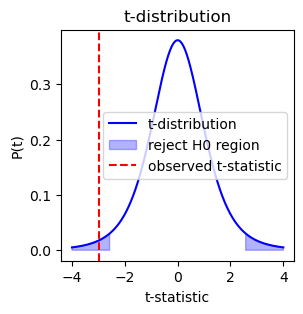

In [9]:
# Plot the t-distribution and the observed t-statistic

# Here, we plot the t-distribution with the observed t-statistic and the significance level
# shaded. The title of the plot is the title parameter.  This give some insight into the
# interpretation of the p-value, but is not typically included in a publication or report.

degrees_of_freedom = len(normal0) + len(normal1) - 2
significance_level = 0.05

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plot_t_distribution(ax, significance_level, t_statistic, sided=alternative, \
                    title=f't-distribution')

Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.005
** = 0.001
*** = 0.0001


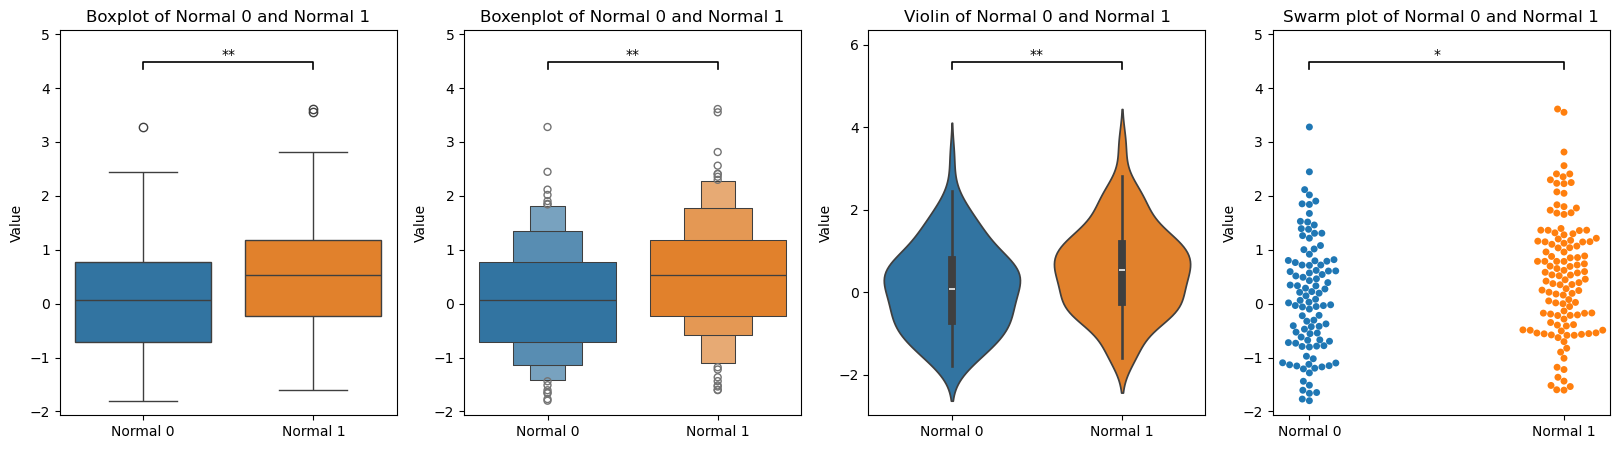

In [10]:
# Making Box Plots and showing Significance using Seaborn
import pandas as pd
#!pip install seaborn
import seaborn as sns

# Put normal0 and normal1 into a pandas DataFrame
df1 = pd.DataFrame({'Normal 0': normal0})  # Create a DataFrame with normal0
df2 = pd.DataFrame({'Normal 1': normal1})  # Create a DataFrame with normal1
df = pd.concat([df1, df2], axis=1) # Concatenate the two DataFrames (note, axis=1 means concatenate along the columns)

def add_signif_bar(ax, x0, x1, p_value, bar_col='k', linewidth=1.2, fontsize=12, significance_levels=[0.05, 0.01, 0.001]):
    # Add significance annotations to the plot
    # Get the y-axis limits
    ylim = ax.get_ylim()
    edge = (ylim[1] - ylim[0]) * 0.02
    bary = ylim[1] + (ylim[1] - ylim[0]) * 0.1
    ax.plot([x0,x0,x1,x1], [bary-edge, bary, bary, bary-edge], lw=linewidth, c=bar_col)
    ax.set_ylim([ylim[0], ylim[1] + (ylim[1] - ylim[0]) * 0.2])
    # Add significance annotations to the plot
    if p_value > significance_levels[0]: 
        significance_level = 'n.s.'
    else:
        significance_level = ''
        for i, alpha in enumerate(significance_levels):
            if p_value < alpha:
                significance_level += '*' 
            else:
                break
    
    ax.text((x0+x1)/2, bary, significance_level, ha='center', va='bottom', c='k')

    print('Significance Levels:')
    for i, significance_level in  enumerate(significance_levels):
        stars = '*'*(i+1)
        print(f'{stars} = {significance_level}')


# Create figures with three subplots
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Create a boxplot of the data using seaborn 
ax[0] = sns.boxplot(data=df, ax=ax[0])
ax[0].set_title('Boxplot of Normal 0 and Normal 1')  # Set the title of the plot 
ax[0].set_ylabel('Value')  # Set the y-axis label of the plot
add_signif_bar(ax[0], 0, 1, p_value)

# Create a boxenplot of the data using seaborn 
ax[1] = sns.boxenplot(data=df, ax=ax[1])
ax[1].set_title('Boxenplot of Normal 0 and Normal 1')  # Set the title of the plot 
ax[1].set_ylabel('Value')  # Set the y-axis label of the plot
add_signif_bar(ax[1], 0, 1, p_value)

# Create a violin of the data using seaborn 
ax[2] = sns.violinplot(data=df, ax=ax[2])
ax[2].set_title('Violin of Normal 0 and Normal 1')  # Set the title of the plot 
ax[2].set_ylabel('Value')  # Set the y-axis label of the plot
add_signif_bar(ax[2], 0, 1, p_value)

# Create a pointplot of the data using seaborn
ax[3] = sns.swarmplot(data=df, ax=ax[3])
ax[3].set_title('Swarm plot of Normal 0 and Normal 1')  # Set the title of the plot 
ax[3].set_ylabel('Value')  # Set the y-axis label of the plot
add_signif_bar(ax[3], 0, 1, p_value, significance_levels=[0.005, 0.001, 0.0001])

plt.show()

### **3.A.5. An aside on the one sided and two sided tests.** 

Consider the strange situation for two data sets, where the t-statistic is 2.2. The positive t-statistic arises when the mean of the first group (Group0) is larger than that of the second group (Group1).  We can plot the t-distribution as we did above with as follows:

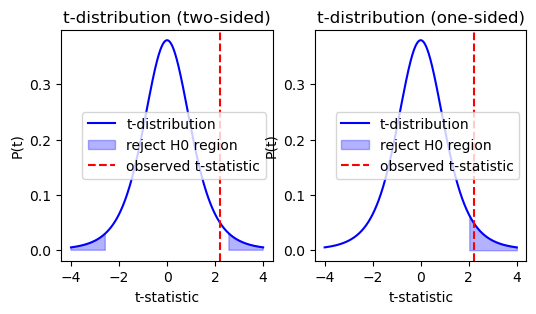

In [11]:
# Make 2 panel figures, one with two-sided and one with one-sided test:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
plot_t_distribution(ax[0], significance_level, 2.2, sided='two-sided', \
                    title=f't-distribution (two-sided)')
plot_t_distribution(ax[1], significance_level, 2.2, sided='greater', \
                    title=f't-distribution (one-sided)')

Notice on the left, that we do **not** have sufficient evidence to reject the null hypothesis that the *two means are equal*.  We could have a t-statistic whose absolute value is 2.2 by chance alone more than 5% of the time if the null hypothesis were true (i.e., if the two means were equal).

But on the right, we **do** have sufficient evidence to reject the null hypothesis that the mean of Group 1 is greater than or equal than that for Group 0. We would observe a t-statistic whose value is 2.2 by chance alone less than 5% of the time if the null hypothesis were true (i.e., if the mean of Group 1 were greater than or equal to that of Group 0).

This seems like a paradox and can lead to a lot of confusion.  

Essentially, the reason for this seeming paradox is that in the two sided test, the null hypothesis (i.e., that the two means are exactly equal), needs to be rejected if the t-statistic is either very large **or** very small. Therefore, the threshold for rejecting the null hypothesis must be higher in the two sided test than in the one sided test.

Read more about this so-called "paradox" here:

https://www.onesided.org/articles/the-paradox-of-one-sided-v-two-sided-tests-of-significance.php

## **3.B. Paired Values t-test**

The **paired t-test** is a statistical test used to determine whether there is a significant difference between the means of two related groups. It's typically used when the samples being compared are not independent but instead have some sort of natural pairing or matching. For example, the paired t-test might be used to compare the effectiveness of a medication before and after treatment in the same group of patients.

Here's how the paired t-test works:

**Data Collection**: You collect data from two related groups, where each observation in one group is paired with a corresponding observation in the other group. For example, if you're comparing measurements before and after giving a hypothetical medication, each patient's measurement before treatment is paired with their measurement after treatment.

**Calculate Differences**: For each pair of observations, calculate the difference between the two measurements. You'll end up with a new set of differences.

**Calculate Sample Mean and Standard Deviation of Differences**: Calculate the mean ($d$) and standard deviation ($\sigma_d$) of these differences.

**Compute the t-statistic**: Use the formula for the one-sample t-test to calculate the t-statistic:

$$ t=\frac{d}{\sigma_d/\sqrt{n}} $$

Where:
* $d$ is the mean of the differences.
* $\sigma_d$​ is the standard deviation of the differences.
* $n$ is the number of pairs.

**Determine the p-value**: Use the t-distribution with $n-1$ degrees of freedom to determine the p-value associated with the calculated t-statistic.

**Limitations**
* The differences between pairs should be normally distributed.
* The paired differences should be independent of each other.

### **3.B.1. Example of Paired t-test**

t-test using our code: t = 0.07313535074007897 p-value = 0.9417722390498324
t-test using built in code: t = 0.07313535074007897 p-value = 0.9417722390498324
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001


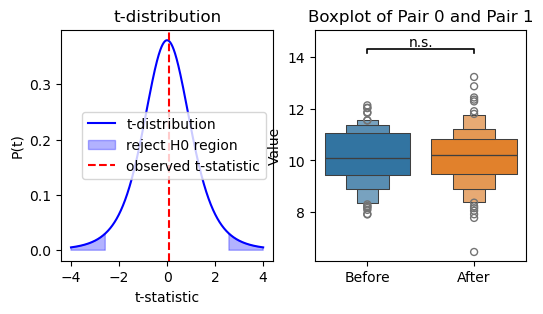

In [12]:
# Let's Illustrate of the Paired t-test
# Generate some paired data
def pairedTTest(data0,data1,alternative='two-sided'):
    # Compute the number of samples in each group
    N = len(data0)
    Ndof = N - 1 # number of degrees of freedom
    
    # Compute the t-statistic
    mu = np.mean(data0-data1)
    sig = np.std(data0-data1)
    t = mu / (sig / np.sqrt(N))
    
    # Compute the p-value for the 1- and 2-sided test:
    if alternative=='two-sided':
        pv = 2*stats.t.sf(np.abs(t), Ndof)
    elif alternative=='greater':
        pv = stats.t.sf(t, Ndof)
    elif alternative=='less':
        pv = stats.t.sf(-t, Ndof)
    return t, pv    

N = len(NormalPairBefore) # number of patients

# Compute the t-test
alternative = 'two-sided'  # 'two-sided', 'greater', or 'less'
t, pv = ttest(NormalPairBefore, NormalPairAfter, alternative=alternative)

# Print the results of the t-test
print('t-test using our code: t =', t, 'p-value =', pv)

# Compare to built in t-test function:
t_statistic, p_value = stats.ttest_rel(NormalPairBefore, NormalPairAfter, alternative=alternative)
print('t-test using built in code: t =', t, 'p-value =', pv)

# Plot the t-distribution and the observed t-statistic using our previous function
degrees_of_freedom = N - 1
significance_level = 0.05
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
plot_t_distribution(ax[0], significance_level, t_statistic, sided=alternative, \
                    title=f't-distribution')

# Plot the data and the significance using seaborn
df1 = pd.DataFrame({'Before': NormalPairBefore})  # Create a DataFrame with NormalPairBefore
df2 = pd.DataFrame({'After': NormalPairAfter})  # Create a DataFrame with NormalPairAfter
df = pd.concat([df1, df2], axis=1) # Concatenate the two DataFrames (note, axis=1 means concatenate along the columns)

# Create a boxenplot 
ax[1] = sns.boxenplot(data=df)
ax[1].set_title('Boxplot of Pair 0 and Pair 1')  # Set the title of the plot 
ax[1].set_ylabel('Value')  # Set the y-axis label of the plot
add_signif_bar(ax[1], 0, 1, pv)


# **4. Non-Parametric Tests**
Non-parametric tests are statistical tests that do not make assumptions about the distribution of the data. They are used when the data do not meet the assumptions of parametric tests or when the data are ordinal or non-normally distributed. Non-parametric tests are often used in situations where the data are skewed, have outliers, or are not normally distributed.

Some of the most common non-parametric tests include the Wilcoxon rank-sum test, the Wilcoxon signed-rank test, the Kolmogorov-Smirnov test, and the Kruskal-Wallis test. These tests are used to compare groups, test for differences between distributions, and assess relationships between variables.


## **4.A. Wilcox Ranked Sum Test (a.k.a, the Mann-Whitney U Test)**

This **Wilcox Ranked Sum** test is used to compare the **medians** of two independent groups. This **non-parametric test** is typically used when the assumptions of the independent samples (needed for the t-test above) are not met, such as when the data are not normally distributed or when the variances are not equal.

Here's a brief overview of the Wilcoxon rank-sum test (Mann-Whitney U test):

**Purpose**: The Wilcoxon rank-sum test is used to determine whether the distributions of two independent groups differ significantly in terms of their medians.

**Assumptions**: The main assumption of the Wilcoxon rank-sum test is that the two groups are independent and that the data within each group are at least ordinal (that is there is some natural ranking for the data, i.g., $a<b<c<c<d,\ldots $).

**Null Hypotheses**.  Like the t-test, the Wilcox Ranked Sum can be evaluated as a **two-sided** or **one-sided** test.  The corresponding Null-Hypotheses are:     
* **Two-Sided Test Null Hypothesis**:  The medians of the two independent groups are equal.
* **Left Tailed Test Null Hypothesis**: The median of group 1 is greater than or equal to the median of group 2.
* **Right Tailed Test Null Hypothesis**: The median of group 1 is less than or equal to the median of group 2.

## **4.A.1. Wilcox Ranked Sum Test Procedure, Interpretation, and Limitations**:
1) Combine the data from the two groups into a single dataset.
2) Rank all the observations in the combined dataset from smallest to largest, ignoring the group labels.
3) Calculate the sum of ranks for each group.
4) Use the smaller of the two sums of ranks as the test statistic (often denoted as U).
5) Compare the test statistic to critical values from the Wilcoxon rank-sum distribution or calculate a p-value.

**Interpretation**: If the test statistic is significantly different from what would be expected by chance, it suggests that the distributions of the two groups differ significantly in terms of their medians.

**Limitations**
The Wilcoxon rank-sum test is a non-parametric alternative to the independent samples t-test and is particularly useful when the assumptions of the t-test are not met. It does not assume normality or equal variances and is based on the ranks of the observations rather than their actual values.  However, like all tests, it has limitations:

* **Assumption of Independence**: The Wilcoxon rank-sum test assumes that the observations within each group are independent of each other and that the two groups are independent of each other. Violations of this assumption can lead to inaccurate results.

* **Ordinal Data Requirement**: While the Wilcoxon rank-sum test does not require the data to be normally distributed, it does require that the data be at least ordinal. If the data are purely nominal (e.g., categories without a natural order), the test may not be appropriate.

* **Sensitivity to Ties**: The Wilcoxon rank-sum test can be sensitive to ties (i.e., identical values) in the data, especially if there are many ties or if the ties are not evenly distributed between the groups. This can affect the accuracy of the test results.

* **Less Power Than the t-test**: In general, parametric tests such as the independent samples t-test tend to have more statistical power (i.e., are better at detecting true differences) than non-parametric tests like the Wilcoxon rank-sum test, especially when the assumptions of the parametric tests are met.

* **Difficulty in Interpreting Effect Size**: While the Wilcoxon rank-sum test can determine whether there is a statistically significant difference between the groups, it does not provide a direct measure of effect size. Interpreting the practical significance of the results can therefore be more challenging compared to parametric tests.

## **4.A.2. Example for Performing the Wilcox Ranked Sum test for unpaired data**

In [13]:
# Now, let's apply the Wilcoxon Ranked Sum Test to our original data sets
# Compute the Wilcoxon ranked sum test
t, pv = stats.ranksums(normal0, normal1)
print('Wilcoxon ranked sum test: t =', t, 'p-value =', pv)

Wilcoxon ranked sum test: t = -2.852545897886222 p-value = 0.0043370548740586466


### **4.A.2. Example for Performing the Wilcox Ranked Sum test for Paired data**

In [14]:
# Now, let's apply the Wilcoxon Ranked Sum Test to our paired data sets
# Compute the Wilcoxon ranked sum test
t, pv = stats.wilcoxon(NormalPairBefore, NormalPairAfter)
print('Wilcoxon ranked sum test: t =', t, 'p-value =', pv)

# Let's see how that compares to the t-test
t, pv = pairedTTest(NormalPairBefore, NormalPairAfter)
print('t-test: t =', t, 'p-value =', pv)

Wilcoxon ranked sum test: t = 2391.0 p-value = 0.6449883613873455
t-test: t = 0.08296194433209719 p-value = 0.9340493128476426


## **4.B. Komogorov Smirnov (KS) Test**

The **Kolmogorov-Smirnov test**, often abbreviated as the **KS test**, is another non-parametric test after mathematicians Andrey Kolmogorov and Nikolai Smirnov. It was first introduced by Kolmogorov in 1933 and later refined by Smirnov in 1948. Originally developed to test goodness-of-fit for continuous probability distributions (we will use it for this a lot later int he course), the KS test has since found widespread application in various fields, including statistics, physics, biology, and finance.

As a **non-parametric** test, meaning it makes no assumptions about the underlying probability distribution of the data. Unlike parametric tests, which rely on specific distributional assumptions, the KS test is more flexible and can be applied to data with unknown distributions or distributions that deviate from normality.

**Specific Null Hypotheses:**
The KS test is designed to test whether a sample comes from a specific continuous distribution, or to compare two samples to determine if they are drawn from the same distribution. The specific null hypotheses tested by the KS test depend on the context:

* **Goodness-of-Fit Test**: The null hypothesis for a goodness-of-fit test is that the sample data are drawn from a specified theoretical distribution.

* **Two-Sample Test**: The null hypothesis for a two-sample KS test is that the two samples are drawn from the same continuous distribution.

## **4.B.1. The KS Statistic** 

The test statistic, denoted as $D$, is computed as the maximum absolute difference between the empirical cumulative distribution functions (ECDFs) of the two samples (for a two-sample test) or between the ECDF of the sample and CDF of the theoretical distribution (for a one-sample test). Mathematically, it is calculated as follows:

$$D_{\text{2-sample}}= {\rm max}_i \left| F_1(x_i)−F_2(x_i) \right|$$
$$D_{\text{1-sample}}= {\rm max}_j \left| F_1(x_j)−F(x_j) \right|$$
where $F_1(x_i)$ and $F_2(x_i)$ are the empirical CDFs of the two samples at the $i^{\rm th}$ observation, $F(x_i)$ is the CDF of the theoretical distribution at the $i^{\rm th}$  observation, $x_i$ and $y_j$ are the ordered values of the samples and the theoretical distribution, respectively.

## **4.B.2. Calculating P-Values for the KS Test**:
Once the test statistic $D$ is computed, the p-value is obtained by comparing it to critical values from the Kolmogorov distribution (for one-sample tests) or the limiting distribution (for large sample sizes in two-sample tests) or by simulation or tabulation (for small sample sizes in two-sample tests). The specific distribution of the test statistic under the null hypothesis depends on the sample size, denoted by $n$, and whether it's a one-sample or two-sample test.

* **P-Values for One-Sample Test**:
    
    For a one-sample KS test (where we compare a sample to a specified theoretical distribution), the distribution of the test statistic $D$ is approximated by the **Kolmogorov distribution**, which is derived from the properties of the Kolmogorov-Smirnov statistic. The Kolmogorov distribution's cumulative distribution function (CDF) is complex and cannot be represented by a simple mathematical formula. Instead, critical values or p-values are typically obtained from tables or computational algorithms.

* **P-Values for Two-Sample Test**:
    
    For a two-sample KS test, when comparing two samples to determine if they are drawn from the same distribution, the distribution of the test statistic $D$ depends on the sample sizes $n_1$​ and $n_2$​. When both sample sizes are large (usually $n_1,n_2>35$), the distribution of $D$ can be approximated by the limiting distribution derived by Smirnov. However, for smaller sample sizes, the distribution of $D$ can be complex and is typically determined empirically through simulation or tabulation.

For **two-sided** tests, where the alternative hypothesis is that the samples are not drawn from the same distribution, the p-value is computed as the probability of observing a test statistic greater than or equal to the observed value, plus the probability of observing a test statistic smaller than or equal to the negative of the observed value. 

For **one-sided** tests, the p-value is calculated using only one of these probabilities, depending on the direction of the alternative hypothesis.

In summary, the Kolmogorov-Smirnov test is a powerful tool in statistical analysis, particularly useful when distributional assumptions are unknown or not met. Its versatility and simplicity make it a valuable asset in hypothesis testing and model validation across a wide range of disciplines.

## **4.B.3. Python Example of KS Test.**

Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
KS test using built in code: KS = 0.18166666666666667 p-value = 0.04788706908457164


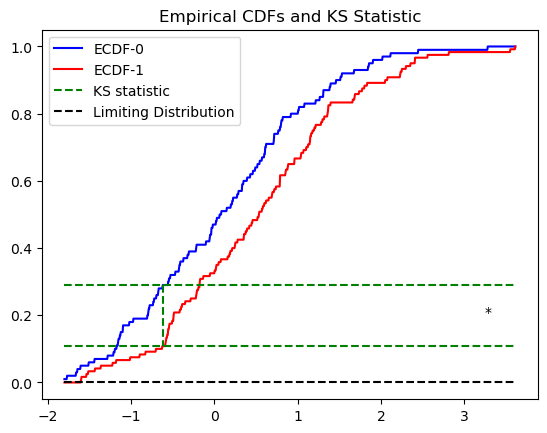

In [15]:
# Example for the KS Test.

# Make a function called "KS_illustrate" to compute and plot the cumnulative distributions for two empirical data sets.
# The function should also compute the KS statistic, and draw a vertical line at the location
# of the KS statistic on the plot between the two CDFs. The title of the plot should be the
# title parameter. The function should return the KS statistic and the p-value for the KS test.
from statsmodels.distributions.empirical_distribution import ECDF

def KS_illustrate(data0, data1, title=' ', significance_levels=[0.05, 0.01, 0.001]):
    # Compute the empirical CDFs
    ecdf0 = ECDF(data0)
    ecdf1 = ECDF(data1)
    
    # Create a range of x values from -4 to 4
    x = np.linspace(min(data0.min(),data1.min()), max(data0.max(),data1.max()), 1000)
    # Compute the CDFs for the two data sets
    y0 = ecdf0(x)
    y1 = ecdf1(x)
    
    # Compute the KS statistic and the location of the KS statistic
    ks = np.max(np.abs(y0-y1))
    xks = x[np.argmax(np.abs(y0-y1))]

    # Compute the p-value for the KS test
    pv = stats.ks_2samp(data0, data1)

    # Create a figure and axis
    ax = plt
    
    # Plot the CDFs for the two data sets
    ax.plot(x, y0, 'b', label='ECDF-0')
    ax.plot(x, y1, 'r', label='ECDF-1')

    # Draw a vertical line at the location of the KS statistic
    ax.plot([xks,xks],[ECDF(data0)(xks),ECDF(data1)(xks)],'g--',label='KS statistic' )
    
    # Draw a horizontal line at the height of the KS statistic
    ax.plot([min(data0.min(),data1.min()),max(data0.max(),data1.max())],[ECDF(data0)(xks),ECDF(data0)(xks)],'g--')
    ax.plot([min(data0.min(),data1.min()),max(data0.max(),data1.max())],[ECDF(data1)(xks),ECDF(data1)(xks)],'g--')

    # make a plot of the limiting distribution of the KS statistic in a new plot
    ax.plot(x, stats.kstwobign.cdf(x, len(data0), len(data1)), 'k--', label='Limiting Distribution')

    # Add a legend
    ax.legend()
    # Set the title of the plot
    ax.title(title)

    # Add significance annotations to the plot
    if pv.pvalue > significance_levels[0]: 
        significance_level = 'n.s.'
    else:
        significance_level = ''
        for i, alpha in enumerate(significance_levels):
            if pv.pvalue < alpha:
                significance_level += '*' 
            else:
                break
    
    xlim = ax.xlim()
    ysign = (ECDF(data0)(xks)+ECDF(data1)(xks))*0.475
    ax.text(xlim[1]-0.1*(xlim[1]-xlim[0]), ysign, significance_level, ha='center', va='bottom', c='k')

    print('Significance Levels:')
    for i, significance_level in  enumerate(significance_levels):
        stars = '*'*(i+1)
        print(f'{stars} = {significance_level}')

    return ks, pv

# Compute the KS statistic and p-value for the KS test
ks, pv = KS_illustrate(normal0, normal1, title='Empirical CDFs and KS Statistic')

# Or if we just want to compute using builtin function:
ks_statistic, p_value = stats.ks_2samp(normal0, normal1)
print('KS test using built in code: KS =', ks_statistic, 'p-value =', p_value)

# **5. ANOVA (ANalysis Of VAriance)**
## **5.A. Introduction to ANOVA**

![alt text](figuresC/image.007.png)

## **5.B. Steps for Performing the ANOVA**
![alt text](figuresC/image.008.png)

## **5.C. Example of the ANOVA test in Python**

### Using our own (Unoptimized) Codes

In [16]:
# example of a data set on which to perform ANOVA
N = 100
Ngroups = 3
group0 = rng.normal(0, 1, N)
group1 = rng.normal(0.01, 1, N)
group2 = rng.normal(1, 1, N)

# Running the ANOVA test without the use of the built-in function
# compute the f statistic
N = [len(group0), len(group1), len(group2)]
Ngroups = len(N)
Ndata = N[0] + N[1] + N[2]
data = np.concatenate((group0, group1, group2))

# Compute the group means and overall means.
grandMean = np.mean(data)
groupMean = [np.mean(group0), np.mean(group1), np.mean(group2)]

# Compute the group variances
groupVar = [np.var(group0), np.var(group1), np.var(group2)]

# Compute the within group mean square differences
dfwithin = Ndata - Ngroups
SSW = np.dot(N, groupVar)
MSwithin = SSW / dfwithin

# Compute the between group mean square differences
dfbetween = Ngroups - 1
SSB = np.dot(N, (groupMean - grandMean)**2)
MSbetween = SSB / dfbetween

# Comptue the F-statistic
F = MSbetween / MSwithin

# Compute the p-value using the F-distribution
pv = 1 - stats.f.cdf(F, dfbetween, dfwithin)
print('ANOVA (Custom): F =', F, 'p-value =', pv)


ANOVA (Custom): F = 37.11125625124343 p-value = 4.107825191113079e-15


### Using the Builtin Stats routines.

In [17]:
# Now, lets compare our result to the built-in ANOVA function
F, pv = stats.f_oneway(group0, group1, group2)
print('ANOVA (Built in): F =', F, 'p-value =', pv)

ANOVA (Built in): F = 37.111256251243425 p-value = 4.1080745146469355e-15


# **6. Tukey Honestly Significant Difference Test**

Upon rejecting the null hypothesis in the ANOVA test, we have evidence that the groups do not all have the same mean, but we do not yet know which groups are significantly different from which other groups. And, when there are lots of groups (e.g., lots of different drugs being tested), this may not be a trivial concern.

The Tukey HSD test is a pairwise comparison test, and it is used to determine which groups are different from which other groups. The test is based on the studentized range distribution, and it is used to determine the minimum difference between group means that is statistically significant.  The more groups that there are the more likely it is that some pairs will be different by mere chance.

In [18]:
# Illustration of the Tukey Honestly Significant Difference (HSD) Test

#mLet's generate some data to use for the Tukey HSD test
N = 100
Ngroups = 20
means = np.zeros(Ngroups)
stds = np.ones(Ngroups)

# Change the means for the last two groups
means[-2:] = [0.5,0.75]

groups = [rng.normal(means[i], stds[i], N) for i in range(Ngroups)]

from statsmodels.stats.multicomp import MultiComparison 
from statsmodels.stats.libqsturng import qsturng

# Create the data
data = np.concatenate(groups)
groupLabels = np.concatenate([[i]*N for i in range(Ngroups)])

# Create a MultiComparison object
mc = MultiComparison(data, groupLabels)

# Compute the Tukey HSD test
result = mc.tukeyhsd()
print(result)
# Print the p-values
print(result.pvalues)

# Now go back and change the number of groups and see how the p-values change.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.1437    1.0 -0.6452 0.3578  False
     0      2  -0.0377    1.0 -0.5392 0.4638  False
     0      3  -0.0388    1.0 -0.5403 0.4627  False
     0      4  -0.1055    1.0  -0.607  0.396  False
     0      5  -0.2203 0.9921 -0.7218 0.2812  False
     0      6  -0.0721    1.0 -0.5736 0.4294  False
     0      7  -0.1562 0.9999 -0.6577 0.3453  False
     0      8  -0.1325    1.0  -0.634  0.369  False
     0      9  -0.2372 0.9819 -0.7387 0.2643  False
     0     10  -0.0525    1.0  -0.554  0.449  False
     0     11   -0.193 0.9985 -0.6945 0.3085  False
     0     12  -0.0778    1.0 -0.5793 0.4237  False
     0     13   0.0905    1.0  -0.411  0.592  False
     0     14  -0.0107    1.0 -0.5122 0.4908  False
     0     15  -0.1212    1.0 -0.6227 0.3803  False
     0     16   -0.109    1.0 -0.6105 0.3925  False
     0     1

Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance Levels:
* = 0.05
** = 0.01
*** = 0.001
Significance

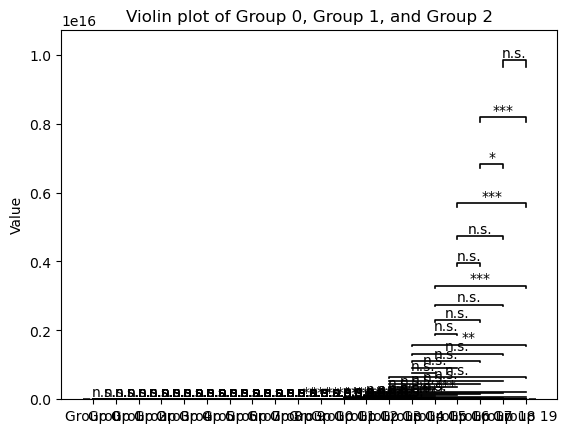

In [19]:
# Make Violin Plots to Visualize the Data and Significance
# Create a pandas DataFrame with each group in a separate column
dflist = [] # Create an empty list to store the DataFrames
for i in range(Ngroups):
    dflist.append(pd.DataFrame({f'Group {i}': groups[i]}))  # Create a DataFrame for each group and append it to the list
df = pd.concat(dflist, axis=1)  # Concatenate the list of DataFrames into a single DataFrame

# Create a violin plot of the data using seaborn
ax = sns.violinplot(data=df)
ax.set_title('Violin plot of Group 0, Group 1, and Group 2')  # Set the title of the plot
ax.set_ylabel('Value')  # Set the y-axis label of the plot

# Add significance annotations to the plot
k = 0
for i in range(Ngroups):
    for j in range(i+1, Ngroups):
        add_signif_bar(ax, i, j, result.pvalues[k])
        k += 1
# add_signif_bar(ax, 0, 1, result.pvalues[0])
# add_signif_bar(ax, 0, 2, result.pvalues[1])
# add_signif_bar(ax, 1, 2, result.pvalues[2])
# add_signif_bar(ax, 1, 2, result.pvalues[2])